# Diffusion2D Python Bindings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Import the bindings
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), 'bin'))

In [2]:
from Diffusion2D import Mesh, BoundaryConditions, Diffusion2D

## Test Problem

In [3]:
# Mesh Dimensions
Lx = Ly = 1.0
Nx = Ny = 100

# Boundary Conditions: 0 = Dirichlet, 1 = Neumann
N = [0, 1]
S = [0, 0]
E = [0, 1]
W = [0, 0]

### Solve Steady State

We can solve the steady state problem with a function call. Uses `Eigen`'s sparse Conjugate Gradient linear solver.

In [ ]:
# Simulation Objects
problem_name = 'Laplace1'
mesh = Mesh(Lx, Ly, Nx, Ny)
bounds = BoundaryConditions(*N, *S, *E, *W)
problem = Diffusion2D(mesh, bounds, 0.0, problem_name)

In [27]:
problem.solveSteady()

In [28]:
XX, YY = np.meshgrid(
    np.linspace(0.0, Lx, Nx),
    np.linspace(Ly, 0.0, Ny)
, indexing='xy')

Text(0, 0.5, 'Y')

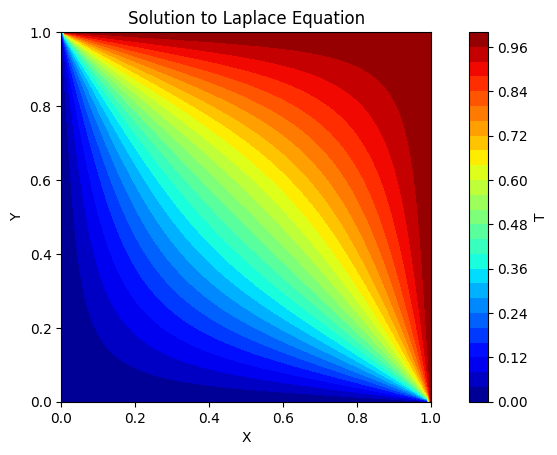

In [29]:
cont = plt.contourf(XX, YY, problem.solField, cmap='jet', levels=30)
clb = plt.colorbar(cont)
clb.set_label('T')
plt.axis('square')
plt.title('Solution to Laplace Equation')
plt.xlabel('X')
plt.ylabel('Y')

### Solve Transient Problem

The transient solution currently requires that we specify an initial guess.

In [4]:
# Simulation Objects
problem_name = 'Laplace2'
mesh = Mesh(Lx, Ly, Nx, Ny)
bounds = BoundaryConditions(*N, *S, *E, *W)
problem = Diffusion2D(mesh, bounds, 0.0, problem_name)

In [5]:
x = np.zeros(mesh.Nunk, dtype=np.float64)
# x = np.ascontiguousarray(x, dtype=np.float64)

problem.solveUnsteady(x, 100.0, 0, 0.1, 1e-6)

In [6]:
x

array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
problem.solField

array([[0. , 1. , 1. , ..., 1. , 1. , 1. ],
       [0. , 0.2, 0.2, ..., 0.2, 0.4, 1. ],
       [0. , 0. , 0. , ..., 0. , 0.2, 1. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.2, 1. ],
       [0. , 0. , 0. , ..., 0. , 0.2, 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])